<a href="https://colab.research.google.com/github/joaomigueld3/natural-language-processing/blob/main/TFIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U spacy

In [2]:
!python -m spacy download 'pt_core_news_lg'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 3.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

# Carregue o modelo do SpaCy para processamento de texto
nlp = spacy.load('pt_core_news_lg')

# Exemplo de corpus
#corpus = [
#    "no meio do caminho tinha uma pedra tinha uma pedra no meio do caminho tinha \
#    uma pedra no meio do caminho tinha uma pedra",
#    "nunca me esquecerei desse acontecimento na vida de minhas retinas tão fatigadas \
#    nunca me esquecerei que no meio do caminho tinha uma pedra tinha uma pedra no \
#    meio do caminho no meio do caminho tinha uma pedra"
#]

#corpus = [
#    "No meio do caminho tinha uma pedra",
#    "Tinha uma pedra no meio do caminho",
#    "Tinha uma pedra no meio do caminho",
#    "Tinha uma pedra",
#    "Nunca me esquecerei desse acontecimento",
#    "Na vida de minhas retinas tão fatigadas",
#    "Nunca me esquecerei",
#    "Que no meio do caminho tinha uma pedra",
#    "Tinha uma pedra no meio do caminho",
#    "No meio do caminho tinha uma pedra"
#]

corpus = [
    "A sustentabilidade é um tema central para o futuro do planeta.",
    "Empresas têm investido cada vez mais em energia renovável para reduzir o impacto ambiental.",
    "O consumo consciente pode mudar o mundo.",
    "Governos ao redor do mundo discutem políticas para mitigar os efeitos das mudanças climáticas.",
    "A preservação da biodiversidade é fundamental para o equilíbrio do ecossistema.",
    "A reciclagem é uma das formas mais simples de ajudar o meio ambiente.",
    "Projetos de energia solar têm crescido exponencialmente nos últimos anos.",
    "É urgente a transição para uma economia de baixo carbono.",
    "As ações para preservar os oceanos são essenciais para combater a poluição por plástico.",
    "A educação ambiental é a chave para conscientizar a sociedade sobre a importância da sustentabilidade."
]

# Função de pré-processamento utilizando o SpaCy
def preprocess(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_punct and not token.is_stop])
    #return " ".join([token.text for token in doc if not token.is_punct])
    #return " ".join([token.text for token in doc if not token.is_punct  and not token.is_stop])

# Pré-processamento do corpus
corpus_processed = [preprocess(doc) for doc in corpus]

# Vetorização TF-IDF
# Este objeto será responsável por converter o texto em uma representação TF-IDF.
vectorizer = TfidfVectorizer()

#Fit (Ajuste): O método fit analisa o corpus e constrói o vocabulário, ou seja,
# cria um conjunto de todas as palavras únicas nos documentos.
# Transform (Transformação): O método transform converte cada documento em um
# vetor TF-IDF usando o vocabulário construído durante o ajuste.
X = vectorizer.fit_transform(corpus_processed)

# Imprime as palavras no vocabulário
print("Vocabulário:", vectorizer.get_feature_names_out())

# Imprime a representação TF-IDF do corpus
print("Matriz TF-IDF:")
print(X.toarray())

#X é uma matriz TF-IDF que pode ser usada como entrada para algoritmos de aprendizado
# de máquina, onde cada linha representa um documento e as colunas representam as
# características (palavras) ponderadas pelo TF-IDF



Vocabulário: ['ajudar' 'ambiental' 'ambiente' 'ano' 'ação' 'biodiversidade' 'carbono'
 'central' 'chave' 'climático' 'combater' 'consciente' 'conscientizar'
 'consumo' 'crescer' 'discutir' 'economia' 'ecossistema' 'educação'
 'efeito' 'empresa' 'energia' 'equilíbrio' 'essencial' 'exponencialmente'
 'forma' 'fundamental' 'futuro' 'governos' 'impacto' 'importância'
 'investir' 'mitigar' 'mudança' 'mudar' 'mundo' 'oceano' 'planeta'
 'plástico' 'poluição' 'política' 'preservar' 'preservação' 'projeto'
 'reciclagem' 'redor' 'reduzir' 'renovável' 'simples' 'sociedade' 'solar'
 'sustentabilidade' 'tema' 'transição' 'urgente' 'último']
Matriz TF-IDF:
[[0.         0.         0.         0.         0.         0.
  0.         0.46015789 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.46015789 0.         0.
  0.         0.         0.         0.         0. 

In [4]:
num_palavras = len(vectorizer.get_feature_names_out())
print(num_palavras)

56


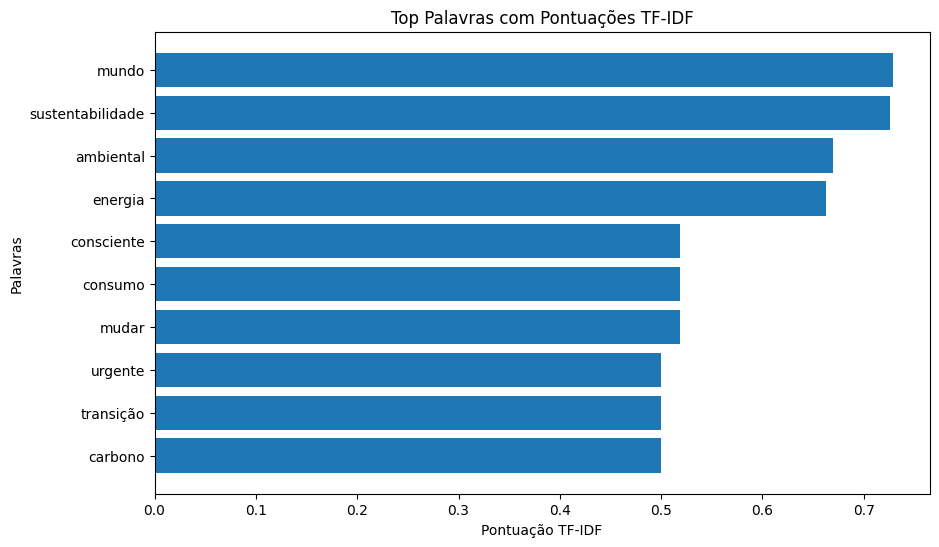

In [5]:
import numpy as np  # Certifique-se de importar numpy
import matplotlib.pyplot as plt

# Visualizar os valores TF-IDF
# Vamos identificar as palavras mais relevantes do corpus usando TF-IDF
def plot_tfidf(matrix, feature_names, top_n=10):
    # Calcula a soma das pontuações TF-IDF para cada palavra
    tfidf_sums = np.array(matrix.sum(axis=0)).flatten()
    top_indices = tfidf_sums.argsort()[-top_n:][::-1]

    # Palavras mais relevantes
    top_words = [feature_names[i] for i in top_indices]
    top_scores = tfidf_sums[top_indices]

    # Criar o gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.barh(top_words, top_scores, align='center')
    plt.gca().invert_yaxis()  # Inverter o eixo y para mostrar os scores em ordem decrescente
    plt.title("Top Palavras com Pontuações TF-IDF")
    plt.xlabel("Pontuação TF-IDF")
    plt.ylabel("Palavras")
    plt.show()

# Visualizar palavras mais relevantes no corpus
plot_tfidf(X, vectorizer.get_feature_names_out(), top_n=10)

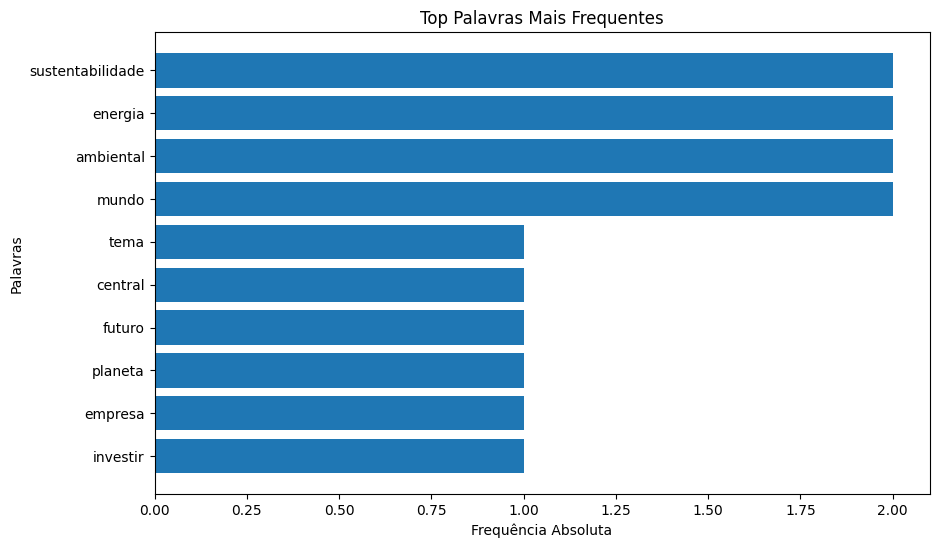

In [6]:
from collections import Counter
import matplotlib.pyplot as plt

# Função para contar as palavras mais frequentes no corpus
def plot_word_frequency(corpus_processed, top_n=10):
    # Unir todos os documentos do corpus em um único texto
    all_words = " ".join(corpus_processed).split()

    # Contar a frequência de cada palavra
    word_counts = Counter(all_words)

    # Selecionar as palavras mais frequentes
    most_common = word_counts.most_common(top_n)
    top_words = [word for word, count in most_common]
    top_counts = [count for word, count in most_common]

    # Criar o gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.barh(top_words, top_counts, align='center')
    plt.gca().invert_yaxis()  # Inverter o eixo y para mostrar as palavras em ordem decrescente
    plt.title("Top Palavras Mais Frequentes")
    plt.xlabel("Frequência Absoluta")
    plt.ylabel("Palavras")
    plt.show()

# Chamando a função para exibir as palavras mais frequentes
plot_word_frequency(corpus_processed, top_n=10)